In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [91]:
train = pd.read_csv('champ_encoded_timeline_data.csv')

In [92]:
def printScores(Y_test,preds):
    print("ROCAUC score:",roc_auc_score(Y_test, preds))
    print("MSE score:",mean_squared_error(Y_test, preds))
    print("R2 score:",r2_score(Y_test, preds))
    
def bound(predictions,minVal=0,maxVal=1):
    for pred in predictions:
        if(pred > maxVal):
            pred = maxVal
        if(pred < minVal):
            pred = minVal
    return predictions

In [93]:
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score # roc_auc_score(y_true, y_score)
from sklearn.metrics import mean_squared_error # mean_squared_error(y_true, y_pred)
from sklearn.metrics import r2_score # r2_score(y_true, y_pred)

In [94]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegressionCV

In [95]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor, XGBRFClassifier

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) 
# This CV spouts off a huge number of deprecated method errors. 

In [97]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [98]:
features = ['P1-Team']
X_train, X_test, Y_train, Y_test, idx1, idx2 = train_test_split(train.loc[:,'P1-Team':'Period'], train['Winner'], train['ID'], test_size=0.20, random_state=66)

In [99]:
params = {}
rr = RidgeCV(alphas=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]).fit(X_train, Y_train)
rfr = RandomForestRegressor(n_estimators=50)
gbr = GradientBoostingRegressor(n_estimators=50)
gbc = GradientBoostingClassifier(n_estimators=50)
xgb = XGBRegressor(objective='reg:squarederror',n_estimators=50)
ab = AdaBoostRegressor(n_estimators=500)
knr = KNeighborsRegressor(n_neighbors=30,weights='distance',algorithm='ball_tree')
ereg = VotingRegressor(estimators=[#('rr', rr),
                                   ('rfr', rfr),
                                   ('gbr', gbr),
                                   ('gbc', gbc),
#                                   ('mlp',mlp),
                                   ('ab',ab),
#                                   ('knr',knr),
#                                   ('gnb',gnb),
                                   ('xgb',xgb)])
searchCV = GridSearchCV(ereg, params, scoring='roc_auc', n_jobs=-1, cv=3)
searchCV.fit(X_train, Y_train)  
predictions = searchCV.predict(X_test)
printScores(Y_test,predictions)

ROCAUC score: 0.8205938155252102
MSE score: 0.17346250657741175
R2 score: 0.3024418298833892


In [100]:
X_train_final = train.drop(['ID','Winner'], axis=1)
predTrain = searchCV.predict(X_train_final)
solutionTrain = pd.DataFrame({"ID":train['ID'], "Winner":predTrain})
solutionTrain.to_csv("VotingReg_MatchPredictions3.csv", index = False)

In [101]:
import matplotlib.pyplot as plt 

In [102]:
def plotMatchWinChance(percentages):
    # x axis values 
    matchlength = len(percentages)
    # corresponding y axis values 
    y = percentages
    x = [0,10,20,30,40,50] 
    x = x[:matchlength]
  
    # plotting the points  
    plt.plot(x, y) 
  
    # naming the x axis 
    plt.xlabel('Minutes in Game') 
    # naming the y axis 
    plt.ylabel('Chance of Win') 
    plt.ylim(0,1)
    # giving a title to my graph 
    plt.title('Win Percentage Throughout Match') 
  
    # function to show the plot 
    plt.show() 

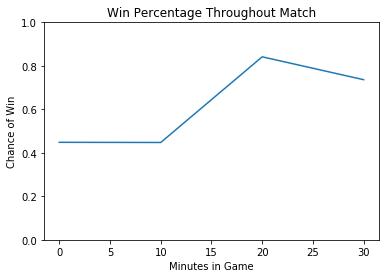

In [103]:
percent = [0.448324426,0.447562876,0.841533116,0.736304908]
plotMatchWinChance(percent)

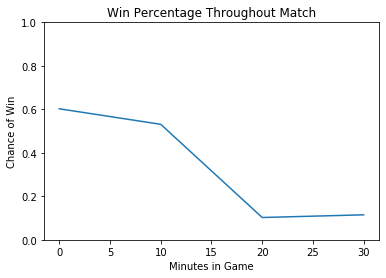

In [104]:
percent = [0.602561177,0.531088954,0.102528711,0.1148878]
plotMatchWinChance(percent)

In [105]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [123]:
print(len(train.loc[:,'P1-Team':'Period'].columns))
X_train, X_test, Y_train, Y_test, idx1, idx2 = train_test_split(train.loc[:,'P1-Team':'Period'], train['Winner'], train['ID'], test_size=0.20, random_state=66)

371


In [124]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(371, input_shape=(371 ,), activation='relu'))
model.add(keras.layers.Dense(742, activation='relu'))
model.add(keras.layers.Dense(371, activation='relu'))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(75, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['MSE'])
model.fit(X_train.values, Y_train.values,  epochs=20)
model.evaluate(X_test.values, Y_test.values)

Epoch 1/20
33632/33632 [==============================] - 7s 205us/sample - loss: 28.7677 - MSE: 28.7677
Epoch 2/20
33632/33632 [==============================] - 6s 181us/sample - loss: 0.5216 - MSE: 0.5216
Epoch 3/20
33632/33632 [==============================] - 7s 194us/sample - loss: 0.3186 - MSE: 0.3186
Epoch 4/20
33632/33632 [==============================] - 7s 203us/sample - loss: 0.2478 - MSE: 0.2478
Epoch 5/20
33632/33632 [==============================] - 7s 210us/sample - loss: 0.2161 - MSE: 0.2161
Epoch 6/20
33632/33632 [==============================] - 7s 197us/sample - loss: 0.1939 - MSE: 0.1939
Epoch 7/20
33632/33632 [==============================] - 7s 194us/sample - loss: 0.1874 - MSE: 0.1874
Epoch 8/20
33632/33632 [==============================] - 7s 204us/sample - loss: 0.1824 - MSE: 0.1824
Epoch 9/20
33632/33632 [==============================] - 7s 199us/sample - loss: 0.1799 - MSE: 0.1799
Epoch 10/20
33632/33632 [==============================] - 7s 205us/sam

[0.16656827008686997, 0.16656817]

In [125]:
predictions = model.predict(X_test)
print(predictions)
printScores(Y_test,predictions)

X_train_final = train.drop(['ID','Winner'], axis=1)
predictions = model.predict(X_train_final)
solutionTrain = pd.DataFrame({"ID":train['ID'], "Winner":predictions[:,0]})
solutionTrain.to_csv("TF-Keras-NN-Predictions2.csv", index = False)

[[0.4821795 ]
 [0.24970843]
 [0.07715221]
 ...
 [0.7001488 ]
 [0.5105436 ]
 [0.3690182 ]]
ROCAUC score: 0.8381011821007726
MSE score: 0.16656826944592829
R2 score: 0.330166157939501


[0.64347327 0.4442967  0.18652478 ... 0.7737882  0.43568876 0.54540056]
